# Ex 1

In [21]:
library('ggplot2')
library('gridExtra')
library('ggExtra')

In [4]:
df = read.table('../Du_lieu/chol.txt', header=TRUE)
head(df)

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,20,176,77,195,nonsmo,b,alive
2,53,167,56,250,sigare,o,dead
3,44,170,80,304,sigare,a,dead
4,37,173,89,178,nonsmo,o,alive
5,26,170,71,206,sigare,o,alive
6,41,165,62,284,sigare,o,alive


In [5]:
summary(df)

      AGE            HEIGHT          WEIGHT            CHOL      
 Min.   :18.00   Min.   :156.0   Min.   : 53.00   Min.   :107.0  
 1st Qu.:28.75   1st Qu.:168.0   1st Qu.: 68.75   1st Qu.:204.0  
 Median :37.00   Median :172.0   Median : 75.00   Median :232.0  
 Mean   :35.72   Mean   :172.3   Mean   : 75.89   Mean   :233.6  
 3rd Qu.:42.00   3rd Qu.:176.0   3rd Qu.: 82.00   3rd Qu.:259.0  
 Max.   :58.00   Max.   :191.0   Max.   :110.00   Max.   :455.0  
    SMOKE              BLOOD               MORT          
 Length:200         Length:200         Length:200        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

In [6]:
str(df)

'data.frame':	200 obs. of  7 variables:
 $ AGE   : int  20 53 44 37 26 41 39 28 33 39 ...
 $ HEIGHT: int  176 167 170 173 170 165 174 171 180 166 ...
 $ WEIGHT: int  77 56 80 89 71 62 75 68 100 74 ...
 $ CHOL  : int  195 250 304 178 206 284 232 152 209 150 ...
 $ SMOKE : chr  "nonsmo" "sigare" "sigare" "nonsmo" ...
 $ BLOOD : chr  "b" "o" "a" "o" ...
 $ MORT  : chr  "alive" "dead" "dead" "alive" ...


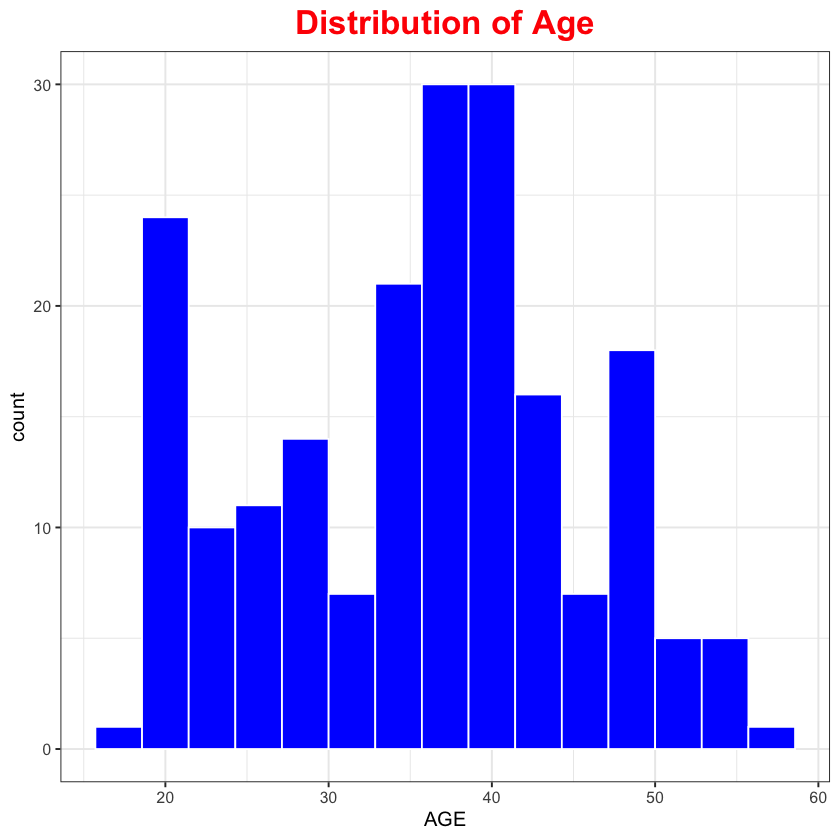

In [15]:
plot = ggplot(df, aes(AGE)) +
     geom_histogram(bins = 15, color = 'white', fill = 'blue') +
     theme_bw(base_size = 12) + 
     ggtitle("Distribution of Age") +
     theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))
plot

`geom_smooth()` using formula 'y ~ x'



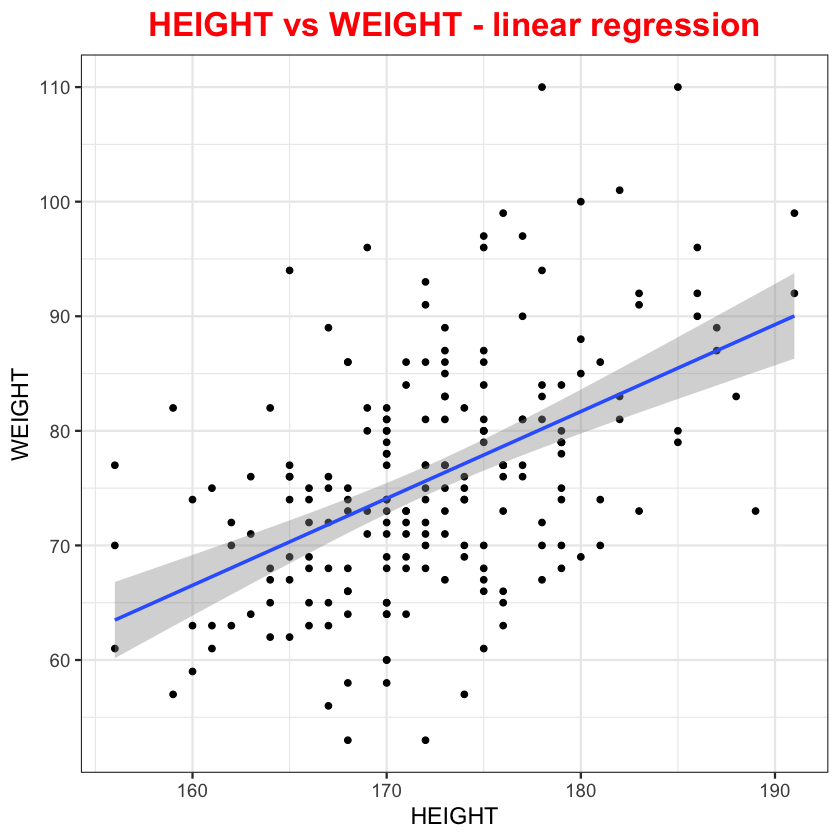

In [18]:
plot = ggplot(data = df, aes(x = HEIGHT, y = WEIGHT)) + 
        geom_point() + theme_bw(base_size=14) + geom_smooth(method = 'lm') + 
        ggtitle("HEIGHT vs WEIGHT - linear regression") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))
plot

`geom_smooth()` using formula 'y ~ x'



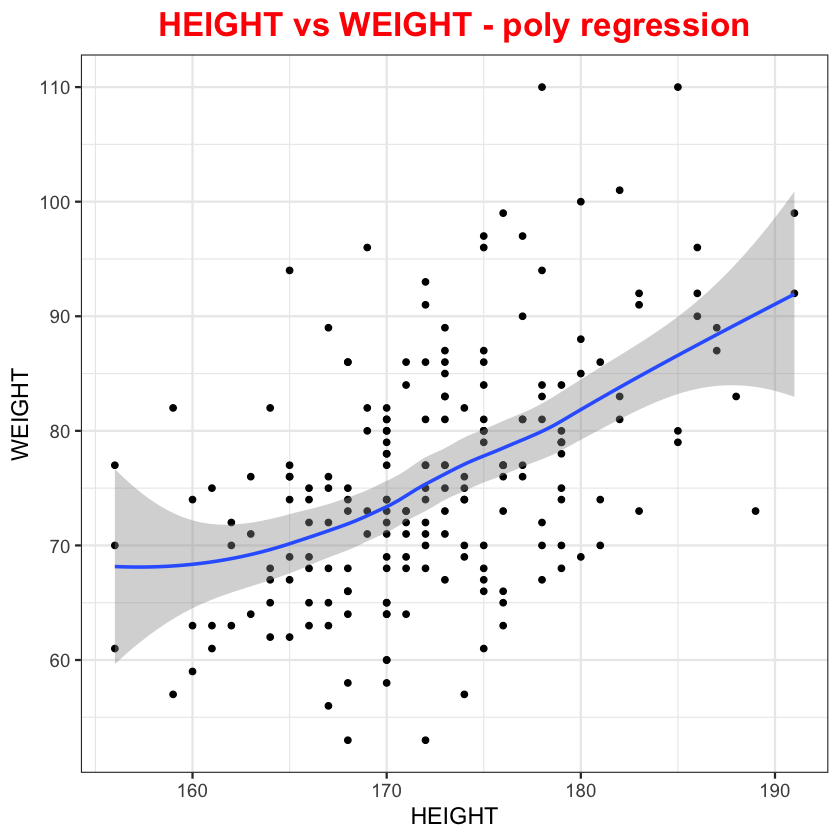

In [19]:
plot = ggplot(data = df, aes(x = HEIGHT, y = WEIGHT)) + 
        geom_point() + theme_bw(base_size=14) + geom_smooth(method = 'loess') +
        ggtitle("HEIGHT vs WEIGHT - poly regression") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))
plot

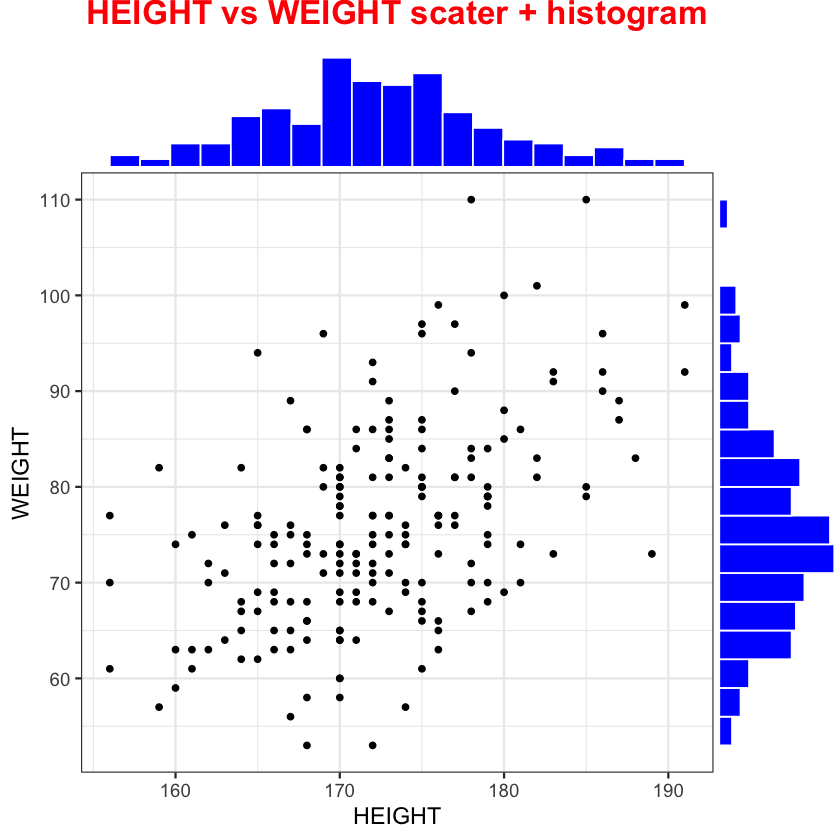

In [23]:
plot = ggplot(data = df, aes(x = HEIGHT, y = WEIGHT)) + 
        geom_point() + theme_bw(base_size=14) +
        ggtitle("HEIGHT vs WEIGHT scater + histogram") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))

ggMarginal(plot, type = 'histogram', col = 'white', fill = 'blue', bins = 20)

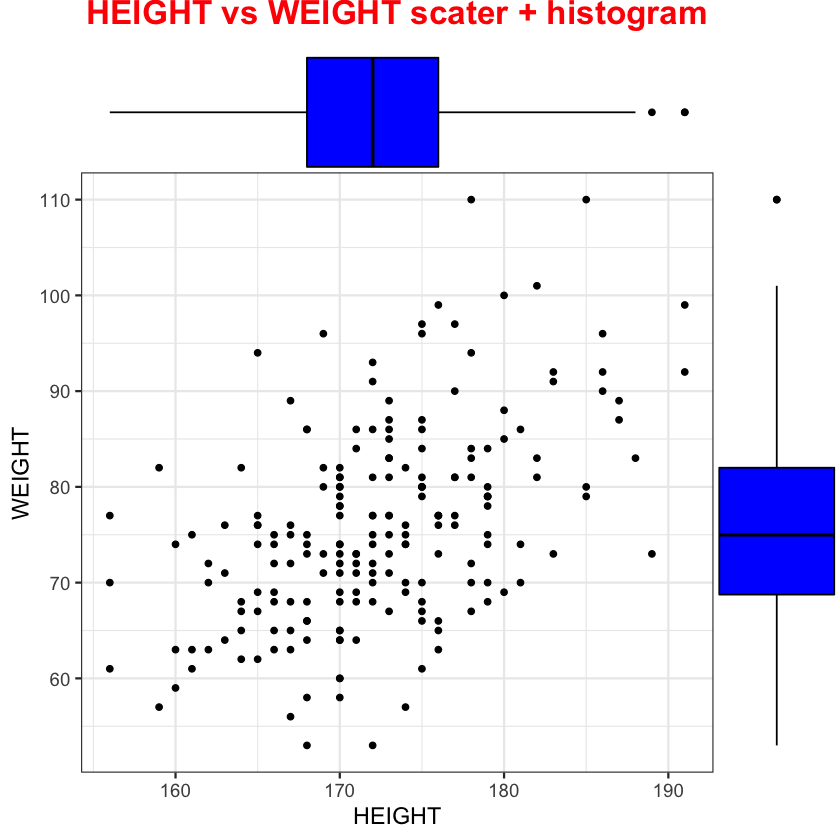

In [30]:
plot = ggplot(data = df, aes(x = HEIGHT, y = WEIGHT)) + 
        geom_point() + theme_bw(base_size=14) +
        ggtitle("HEIGHT vs WEIGHT scater + histogram") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))

ggMarginal(plot, type = 'boxplot', color='black', fill='blue')

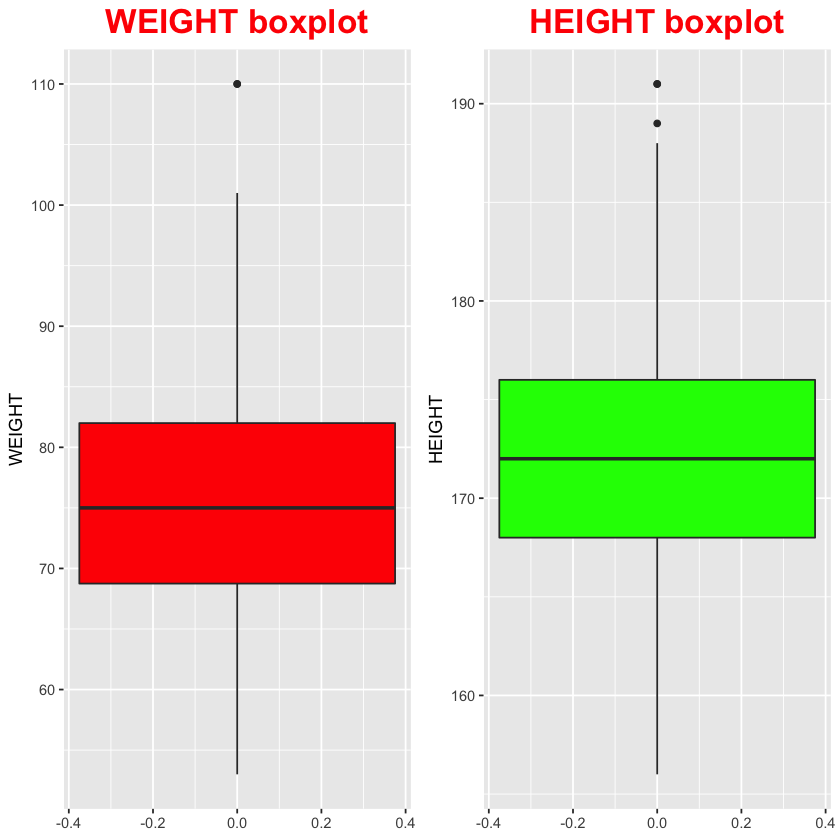

In [43]:
p1 = ggplot(data = df, aes(y=WEIGHT)) + 
        geom_boxplot(fill='red') + 
        ggtitle("WEIGHT boxplot") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))
p2 = ggplot(data = df, aes(y=HEIGHT)) + 
        geom_boxplot(fill='green') + 
        ggtitle("HEIGHT boxplot") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))
grid.arrange(p1, p2, ncol=2)

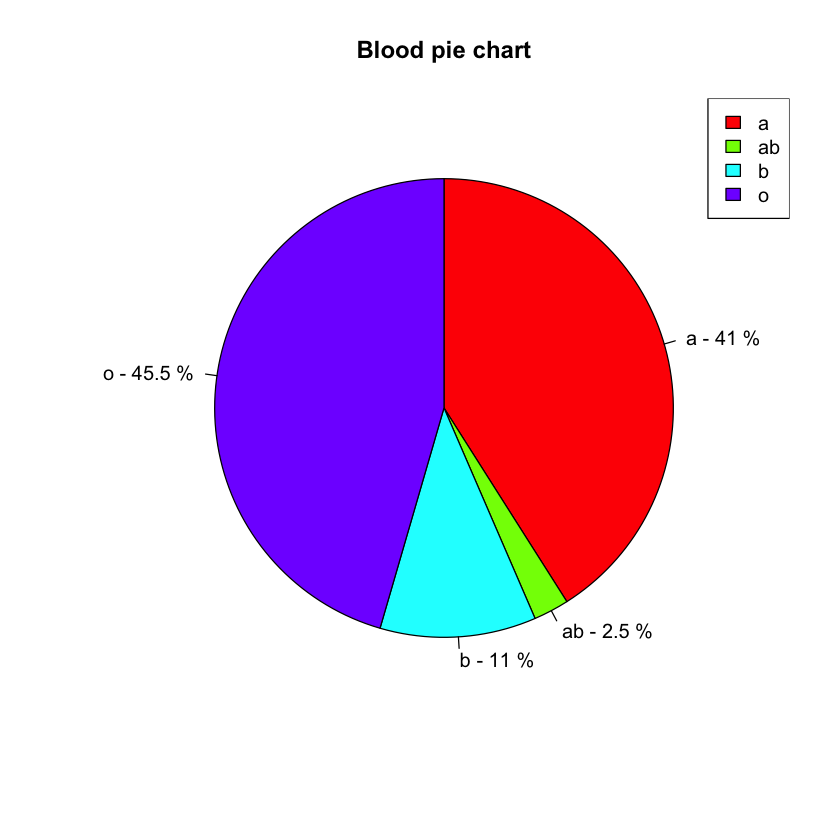

In [78]:
blood_df = as.data.frame(table(df$BLOOD))

x = blood_df[, 2]
labels = as.vector(blood_df[, 1])
piepercent = round(100 * x/sum(x), 1)

pie(x, labels = paste(labels,'-', piepercent, "%"), 
    main = "Blood pie chart",
   col = rainbow(length(x)),
   clockwise = TRUE)
legend("topright", labels, cex = 1, fill = rainbow(length(x)))

# Ex 2

In [104]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



In [92]:
df = read.csv('../Du_lieu/landdata_states.csv')
head(df)

,State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index,Year,Qrtr
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,AK,West,2010.25,224952,160599,64352,28.6,1.481,1.552,2010,1
2,AK,West,2010.50,225511,160252,65259,28.9,1.484,1.576,2010,2
3,AK,West,2009.75,225820,163791,62029,27.5,1.486,1.494,2009,3
4,AK,West,2010.00,224994,161787,63207,28.1,1.481,1.524,2009,4
5,AK,West,2008.00,234590,155400,79190,33.8,1.544,1.885,2007,4
6,AK,West,2008.25,233714,157458,76256,32.6,1.538,1.817,2008,1


In [93]:
summary(df)

    State              region               Date        Home.Value    
 Length:7803        Length:7803        Min.   :1975   Min.   : 18763  
 Class :character   Class :character   1st Qu.:1985   1st Qu.: 62235  
 Mode  :character   Mode  :character   Median :1994   Median :108724  
                                       Mean   :1994   Mean   :135313  
                                       3rd Qu.:2004   3rd Qu.:172030  
                                       Max.   :2013   Max.   :862885  
 Structure.Cost     Land.Value     Land.Share..Pct. Home.Price.Index
 Min.   : 17825   Min.   :   938   Min.   : 5.00    Min.   :0.1350  
 1st Qu.: 53776   1st Qu.:  4178   1st Qu.: 5.00    1st Qu.:0.4550  
 Median : 88352   Median :  9478   Median :10.40    Median :0.7830  
 Mean   : 99534   Mean   : 35779   Mean   :18.17    Mean   :0.8695  
 3rd Qu.:134871   3rd Qu.: 38631   3rd Qu.:26.30    3rd Qu.:1.2075  
 Max.   :325595   Max.   :594417   Max.   :81.70    Max.   :2.8930  
 Land.Price.Index   

In [94]:
str(df)

'data.frame':	7803 obs. of  11 variables:
 $ State           : chr  "AK" "AK" "AK" "AK" ...
 $ region          : chr  "West" "West" "West" "West" ...
 $ Date            : num  2010 2010 2010 2010 2008 ...
 $ Home.Value      : int  224952 225511 225820 224994 234590 233714 232999 232164 231039 229395 ...
 $ Structure.Cost  : int  160599 160252 163791 161787 155400 157458 160092 162704 164739 165424 ...
 $ Land.Value      : int  64352 65259 62029 63207 79190 76256 72906 69460 66299 63971 ...
 $ Land.Share..Pct.: num  28.6 28.9 27.5 28.1 33.8 32.6 31.3 29.9 28.7 27.9 ...
 $ Home.Price.Index: num  1.48 1.48 1.49 1.48 1.54 ...
 $ Land.Price.Index: num  1.55 1.58 1.49 1.52 1.89 ...
 $ Year            : int  2010 2010 2009 2009 2007 2008 2008 2008 2008 2009 ...
 $ Qrtr            : int  1 2 3 4 4 1 2 3 4 1 ...


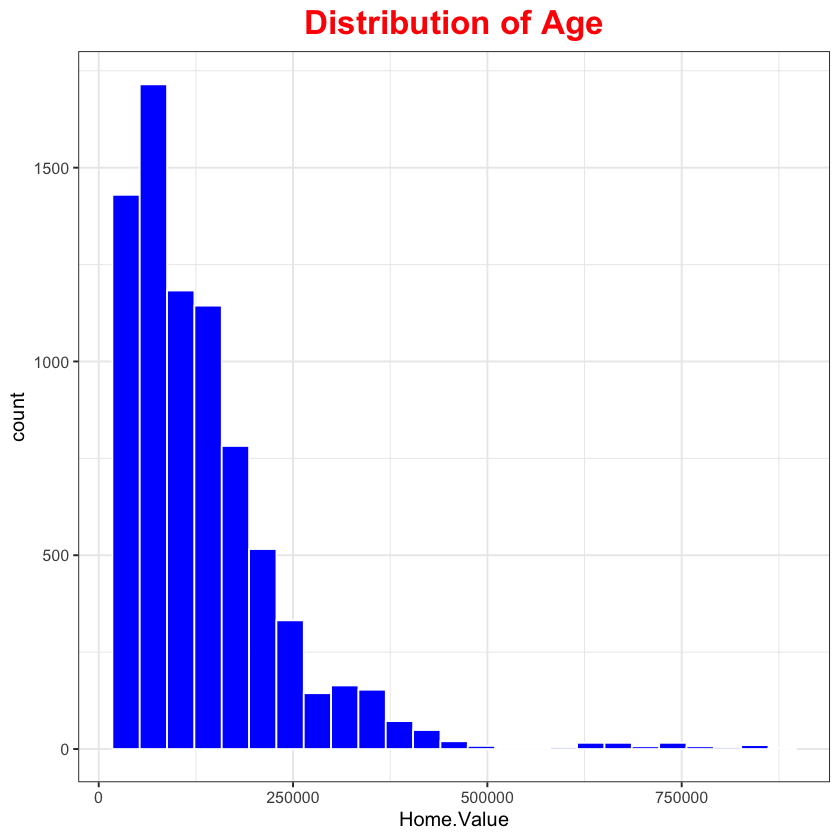

In [96]:
plot = ggplot(df, aes(Home.Value)) +
     geom_histogram(bins = 25, color = 'white', fill = 'blue') +
     theme_bw(base_size = 12) + 
     ggtitle("Distribution of Age") +
     theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))
plot

In [106]:
df_filter = filter(df, Date == '2001.25')
head(df_filter)

,State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index,Year,Qrtr
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,AK,West,2001.25,156664,110027,46637,29.8,1.031,1.041,2001,1
2,AL,South,2001.25,115113,86846,28267,24.6,1.030,1.068,2001,1
3,AR,South,2001.25,100293,83398,16894,16.8,1.039,1.110,2001,1
4,AZ,West,2001.25,168724,92652,76072,45.1,1.049,1.084,2001,1
5,CA,West,2001.25,330676,118865,211811,64.1,1.102,1.152,2001,1
6,CO,West,2001.25,226894,92568,134326,59.2,1.075,1.104,2001,1


`geom_smooth()` using formula 'y ~ x'



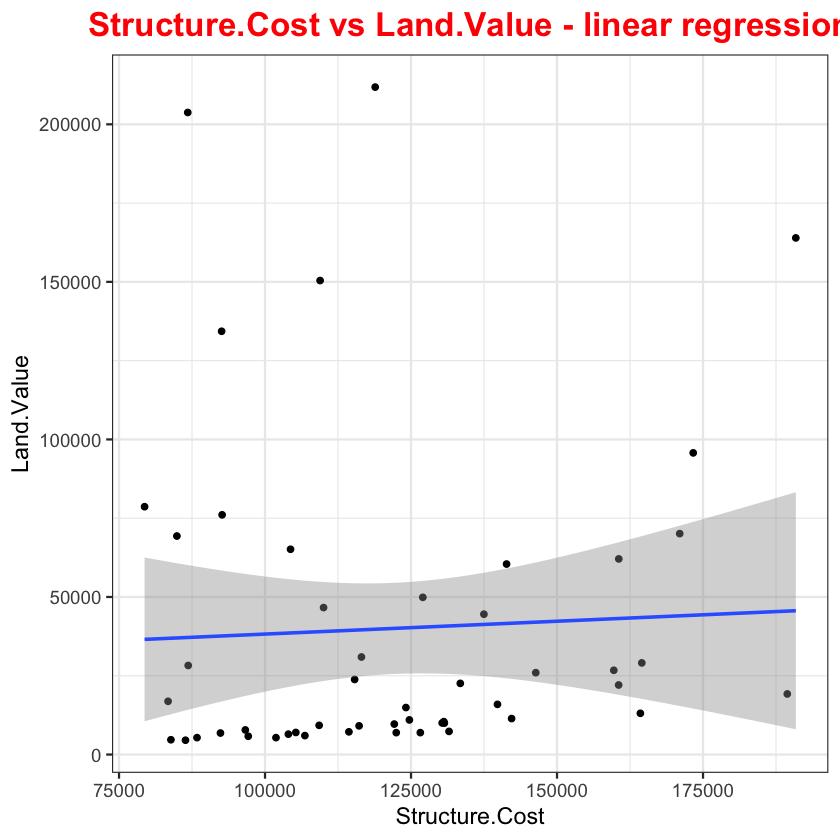

In [109]:
plot = ggplot(data = df_filter, aes(x = Structure.Cost, y = Land.Value)) + 
        geom_point() + theme_bw(base_size=14) + geom_smooth(method = 'lm') +
        ggtitle("Structure.Cost vs Land.Value - linear regression") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))
plot

`geom_smooth()` using formula 'y ~ x'



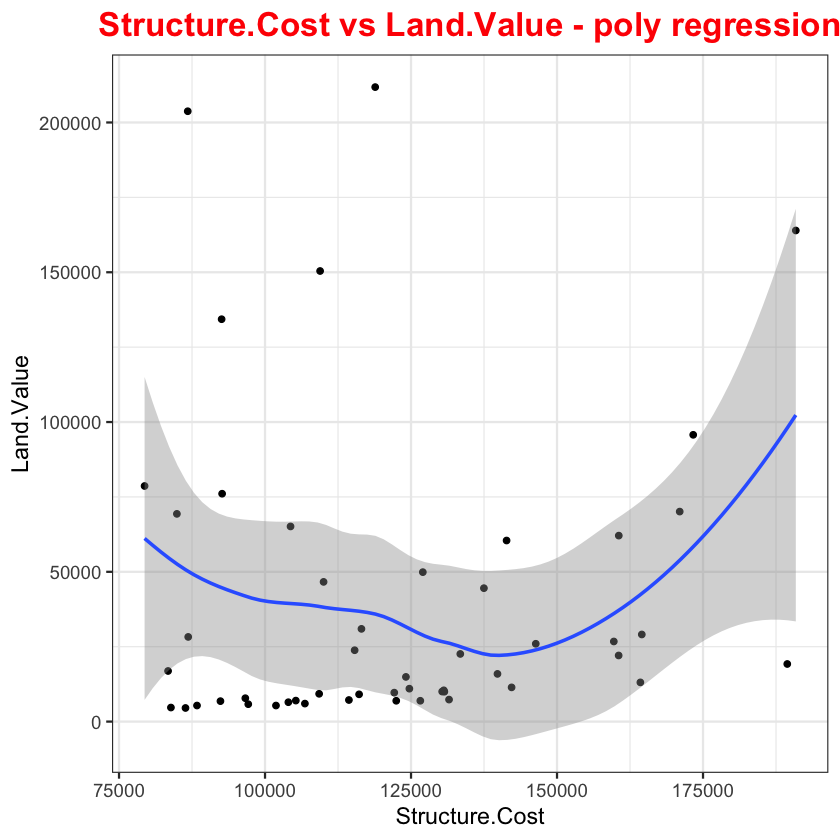

In [107]:
plot = ggplot(data = df_filter, aes(x = Structure.Cost, y = Land.Value)) + 
        geom_point() + theme_bw(base_size=14) + geom_smooth(method = 'loess') +
        ggtitle("Structure.Cost vs Land.Value - poly regression") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))
plot

`geom_smooth()` using formula 'y ~ x'



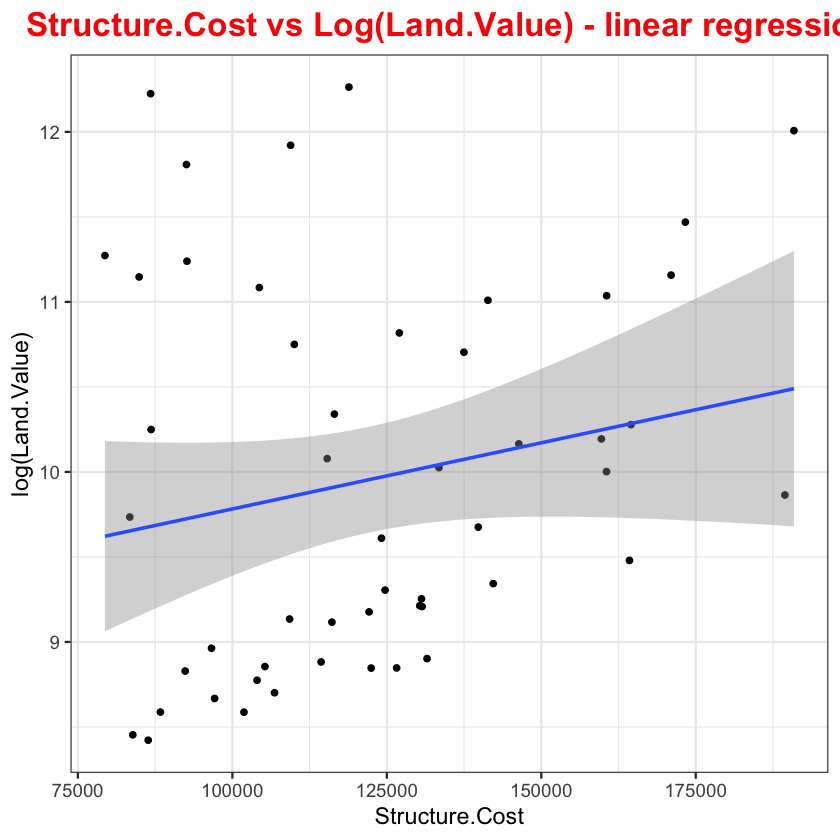

In [112]:
plot = ggplot(data = df_filter, aes(x = Structure.Cost, y = log(Land.Value))) + 
        geom_point() + theme_bw(base_size=14) + geom_smooth(method = 'lm') +
        ggtitle("Structure.Cost vs Log(Land.Value) - linear regression") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))
plot

`geom_smooth()` using formula 'y ~ x'



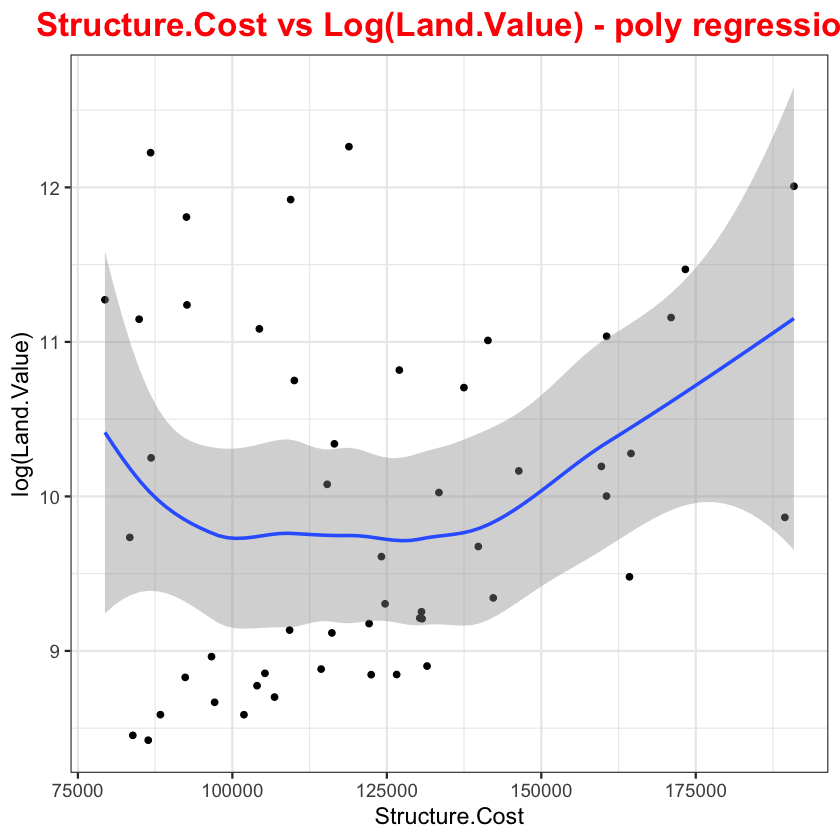

In [113]:
plot = ggplot(data = df_filter, aes(x = Structure.Cost, y = log(Land.Value))) + 
        geom_point() + theme_bw(base_size=14) + geom_smooth(method = 'loess') +
        ggtitle("Structure.Cost vs Log(Land.Value) - poly regression") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))
plot

# Ex 3

In [115]:
df = read.csv('../Du_lieu/EconomistData.csv')
head(df)

,Country,HDI.Rank,HDI,CPI,Region
,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Afghanistan,172,0.398,1.5,Asia Pacific
2,Albania,70,0.739,3.1,East EU Cemt Asia
3,Algeria,96,0.698,2.9,MENA
4,Angola,148,0.486,2.0,SSA
5,Argentina,45,0.797,3.0,Americas
6,Armenia,86,0.716,2.6,East EU Cemt Asia


In [116]:
summary(df)

   Country             HDI.Rank           HDI              CPI       
 Length:173         Min.   :  1.00   Min.   :0.2860   Min.   :1.500  
 Class :character   1st Qu.: 47.00   1st Qu.:0.5090   1st Qu.:2.500  
 Mode  :character   Median : 96.00   Median :0.6980   Median :3.200  
                    Mean   : 95.28   Mean   :0.6581   Mean   :4.052  
                    3rd Qu.:143.00   3rd Qu.:0.7930   3rd Qu.:5.100  
                    Max.   :187.00   Max.   :0.9430   Max.   :9.500  
    Region         
 Length:173        
 Class :character  
 Mode  :character  
                   
                   
                   

In [117]:
str(df)

'data.frame':	173 obs. of  5 variables:
 $ Country : chr  "Afghanistan" "Albania" "Algeria" "Angola" ...
 $ HDI.Rank: int  172 70 96 148 45 86 2 19 91 53 ...
 $ HDI     : num  0.398 0.739 0.698 0.486 0.797 0.716 0.929 0.885 0.7 0.771 ...
 $ CPI     : num  1.5 3.1 2.9 2 3 2.6 8.8 7.8 2.4 7.3 ...
 $ Region  : chr  "Asia Pacific" "East EU Cemt Asia" "MENA" "SSA" ...


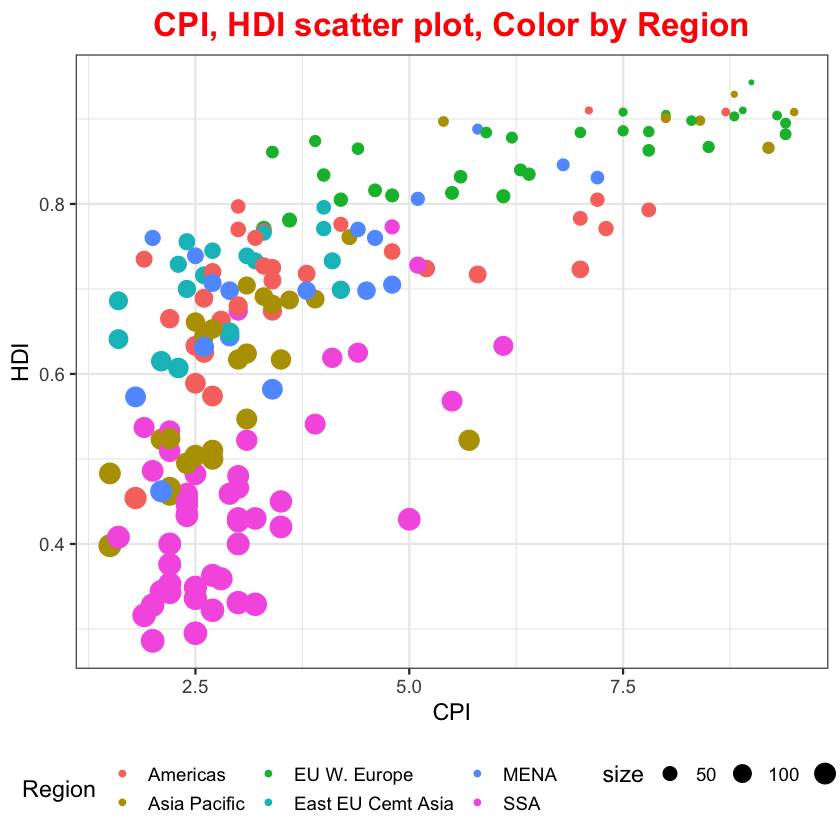

In [122]:
plot = ggplot(data = df, aes(x = CPI, y = HDI, fill = Region, color = Region, lwd = 1)) + 
        geom_point(aes(size = HDI.Rank)) +
        ggtitle("CPI, HDI scatter plot, Color by Region") +
        theme_bw(base_size = 14) +
        theme(legend.position = 'bottom',
              plot.title = element_text(color = 'red', size = 20, face = 'bold', hjust = 0.5))
plot

`geom_smooth()` using formula 'y ~ x'



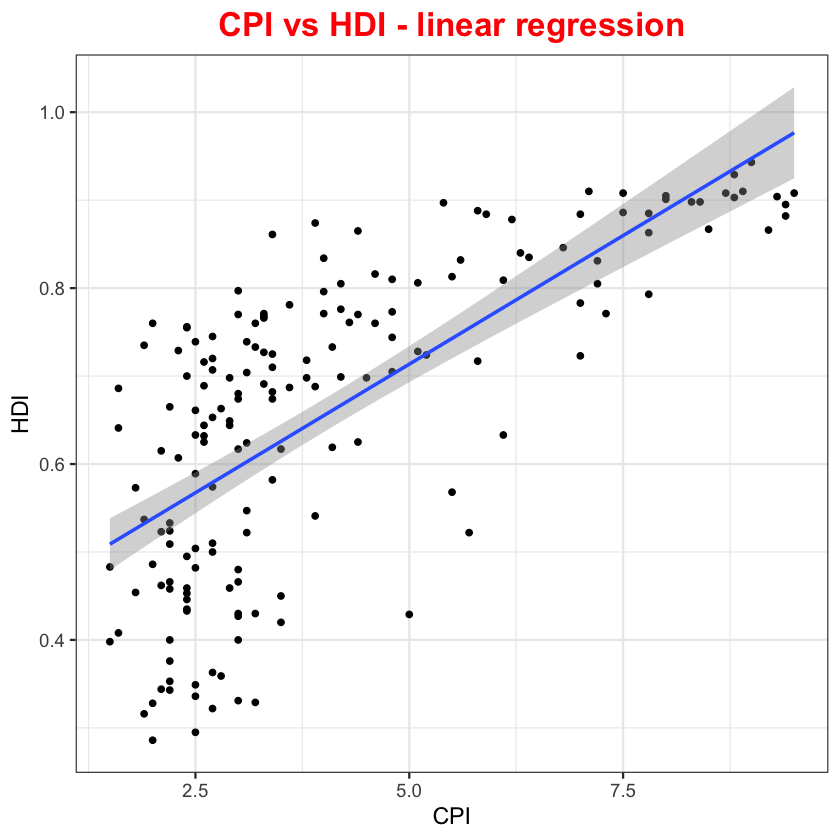

In [123]:
plot = ggplot(data = df, aes(x = CPI, y = HDI)) + 
        geom_point() + theme_bw(base_size=14) + geom_smooth(method = 'lm') +
        ggtitle("CPI vs HDI - linear regression") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))
plot

`geom_smooth()` using formula 'y ~ x'



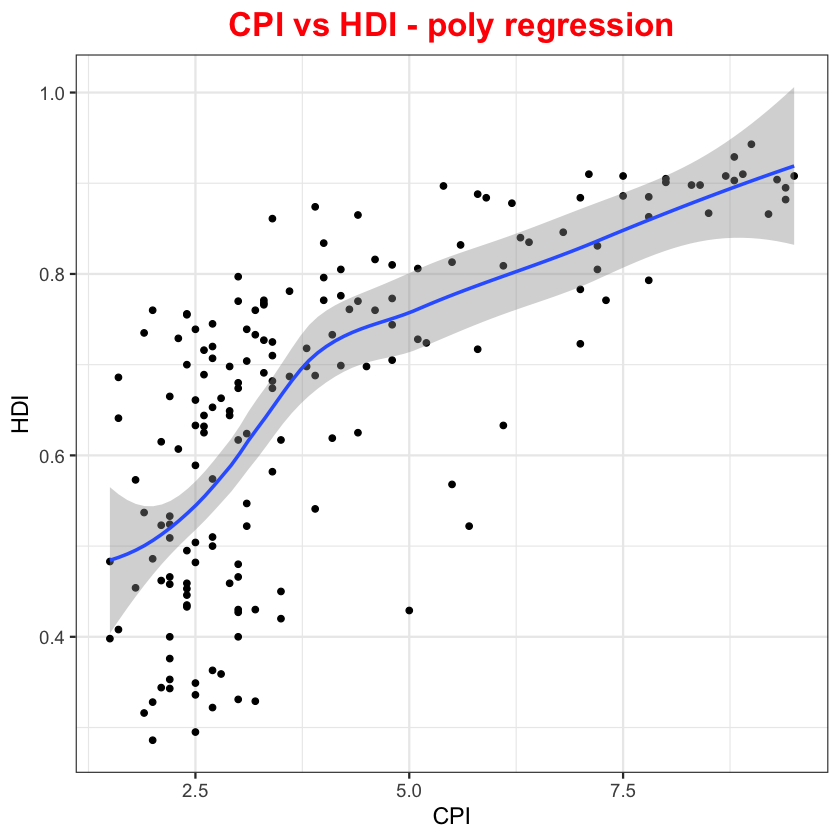

In [125]:
plot = ggplot(data = df, aes(x = CPI, y = HDI)) + 
        geom_point() + theme_bw(base_size=14) + geom_smooth(method = 'loess') +
        ggtitle("CPI vs HDI - poly regression") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))
plot